## References
http://webstructor.net/papers/Kolonin-HP-ACA-IC-text.pdf

In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path)

import pandas as pd
import numpy as np

from pygents.aigents_api import tokenize_re
from pygents.plot import plot_dict
from pygents.util import dictcount, dict_compress_with_loss, dictdict_div_dict, dictdict_mul_dictdict

import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

In [2]:
# Dataset: Unclassified distortions (halilbabacan)
# Paper: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4582307
# Data: https://huggingface.co/datasets/halilbabacan/autotrain-data-cognitive_distortions
# https://huggingface.co/datasets/halilbabacan/autotrain-data-cognitive_distortions/tree/main/raw
# https://huggingface.co/datasets/halilbabacan/autotrain-data-cognitive_distortions/blob/main/raw/Cognitive_distortions.csv
    
binary_dataset_file_path = "./data/corpora/English/distortions/halilbabacan/raw_Cognitive_distortions.csv" 

In [3]:
# Dataset: Multiple Distorions (sagarikashreevastava)
# Paper: https://aclanthology.org/2021.clpsych-1.17/
# Data: https://www.kaggle.com/datasets/sagarikashreevastava/cognitive-distortion-detetction-dataset

# !pip install kagglehub
import kagglehub
multiclass_dataset_path = kagglehub.dataset_download("sagarikashreevastava/cognitive-distortion-detetction-dataset")
print("Path to dataset files:", multiclass_dataset_path)
multiclass_dataset_file_path = multiclass_dataset_path + "/Annotated_data.csv"

Path to dataset files: /Users/akolonin/.cache/kagglehub/datasets/sagarikashreevastava/cognitive-distortion-detetction-dataset/versions/1


In [4]:
df1 = pd.read_csv(binary_dataset_file_path)
df1 = df1.rename(columns={'Text': 'Patient Question', 'Label': 'Dominant Distortion'})
df1.insert(1, "Distorted part", value = np.nan)
df1.insert(3, "Secondary Distortion (Optional)l", value = np.nan)
df1

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)l
0,I'm such a failure I never do anything right.,NaN,Distortion,NaN
1,Nobody likes me because I'm not interesting.,NaN,Distortion,NaN
2,I can't try new things because I'll just mess...,NaN,Distortion,NaN
3,My boss didn't say 'good morning' she must be...,NaN,Distortion,NaN
4,My friend didn't invite me to the party I mus...,NaN,Distortion,NaN
...,...,...,...,...
3522,Since then whenever my mother is out alone I b...,NaN,Distortion,NaN
3523,My family hate him but they didn’t met him at ...,NaN,Distortion,NaN
3524,However I am not happy at the least only half ...,NaN,Distortion,NaN
3525,Now I am at university my peers around me all ...,NaN,Distortion,NaN


In [5]:
df2 = pd.read_csv(multiclass_dataset_file_path) 
df2 = df2.drop('Id_Number', axis=1) # delete columnb with id 
df2

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalization,NaN
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling,Emotional Reasoning
2,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN
3,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning
...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,NaN,No Distortion,NaN
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralization,NaN
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental filter,Mind Reading
2528,From the U.S.: I am a 21 year old woman who ha...,NaN,No Distortion,NaN


In [6]:
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)l,Secondary Distortion (Optional)
0,I'm such a failure I never do anything right.,NaN,Distortion,NaN,NaN
1,Nobody likes me because I'm not interesting.,NaN,Distortion,NaN,NaN
2,I can't try new things because I'll just mess...,NaN,Distortion,NaN,NaN
3,My boss didn't say 'good morning' she must be...,NaN,Distortion,NaN,NaN
4,My friend didn't invite me to the party I mus...,NaN,Distortion,NaN,NaN
...,...,...,...,...,...
6052,I’m a 21 year old female. I spent most of my l...,NaN,No Distortion,NaN,NaN
6053,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralization,NaN,NaN
6054,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental filter,NaN,Mind Reading
6055,From the U.S.: I am a 21 year old woman who ha...,NaN,No Distortion,NaN,NaN


In [7]:
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional)l,Secondary Distortion (Optional)
0,I'm such a failure I never do anything right.,NaN,Distortion,NaN,NaN
1,Nobody likes me because I'm not interesting.,NaN,Distortion,NaN,NaN
2,I can't try new things because I'll just mess...,NaN,Distortion,NaN,NaN
3,My boss didn't say 'good morning' she must be...,NaN,Distortion,NaN,NaN
4,My friend didn't invite me to the party I mus...,NaN,Distortion,NaN,NaN
...,...,...,...,...,...
6052,I’m a 21 year old female. I spent most of my l...,NaN,No Distortion,NaN,NaN
6053,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralization,NaN,NaN
6054,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental filter,NaN,Mind Reading
6055,From the U.S.: I am a 21 year old woman who ha...,NaN,No Distortion,NaN,NaN


In [8]:
df = df3

defaultdict(<class 'int'>, {'Distortion': 2594, 'No Distortion': 1866, 'Personalization': 153, 'Labeling': 165, 'Fortune-telling': 143, 'Magnification': 195, 'Mind Reading': 239, 'All-or-nothing thinking': 100, 'Overgeneralization': 239, 'Mental filter': 122, 'Emotional Reasoning': 134, 'Should statements': 107, ' ': 0})


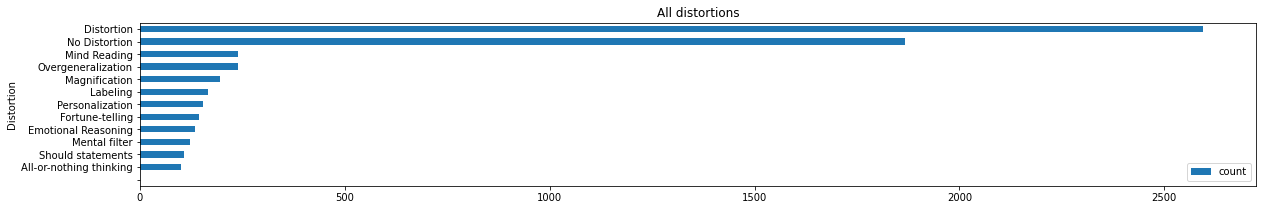

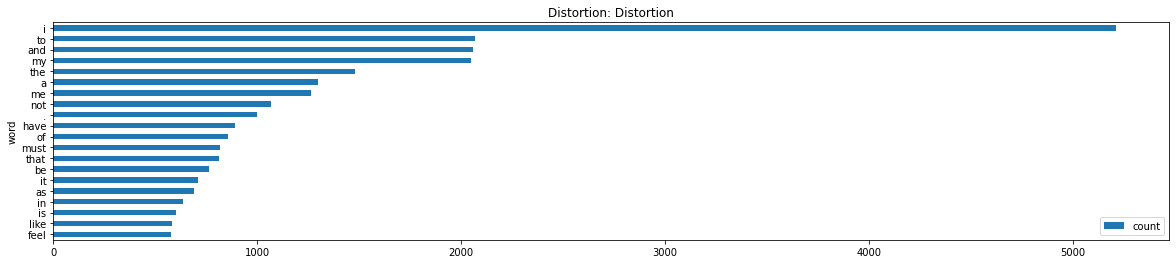

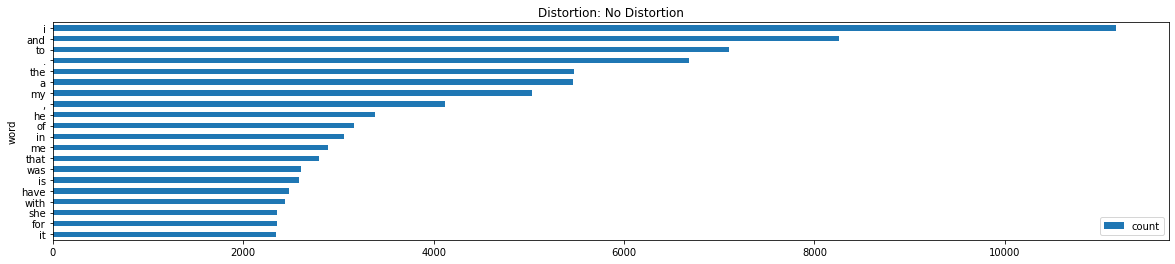

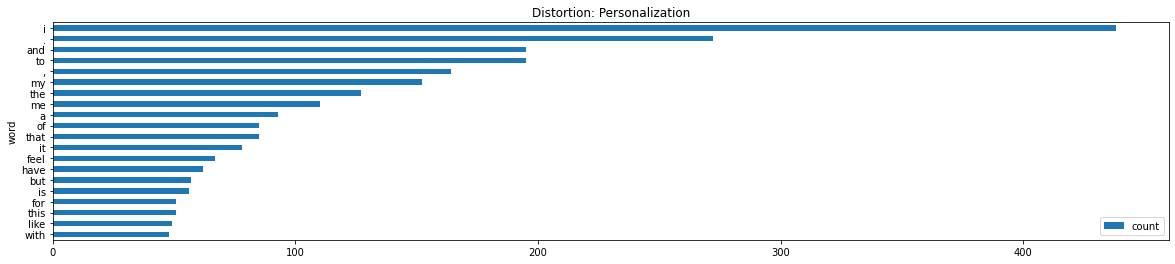

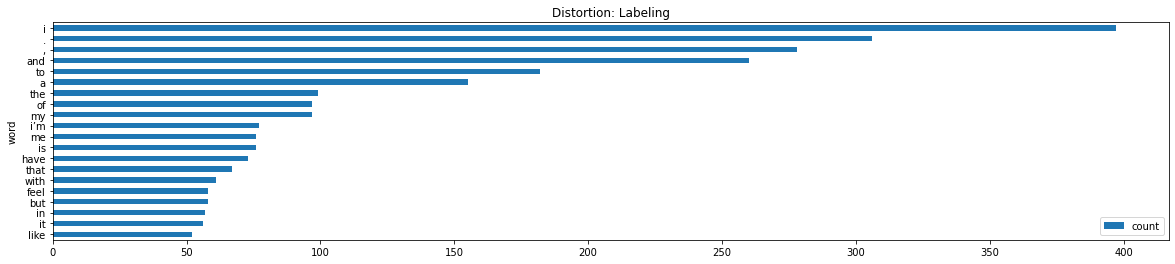

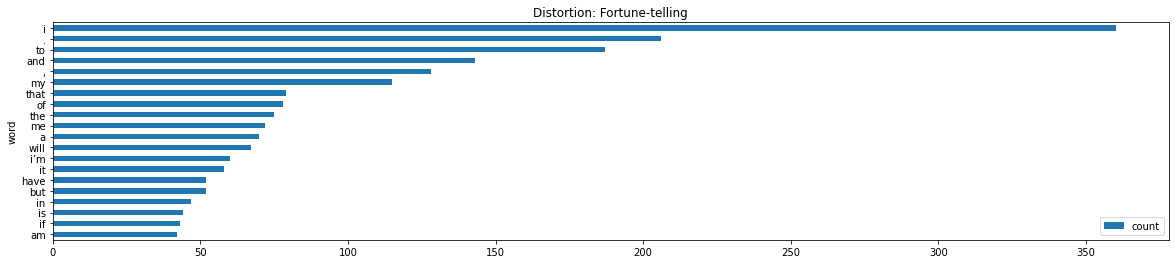

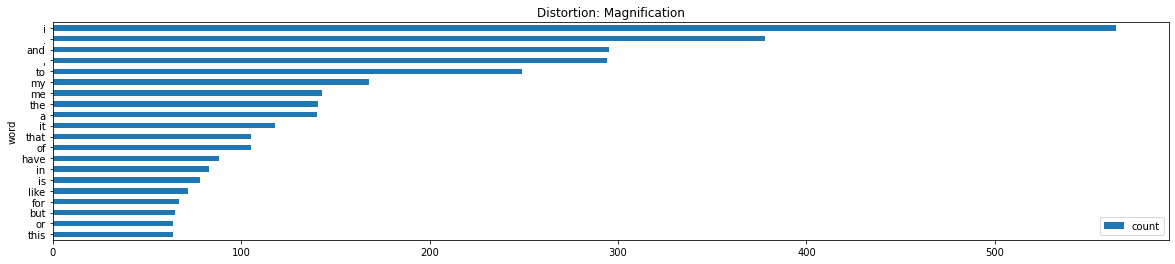

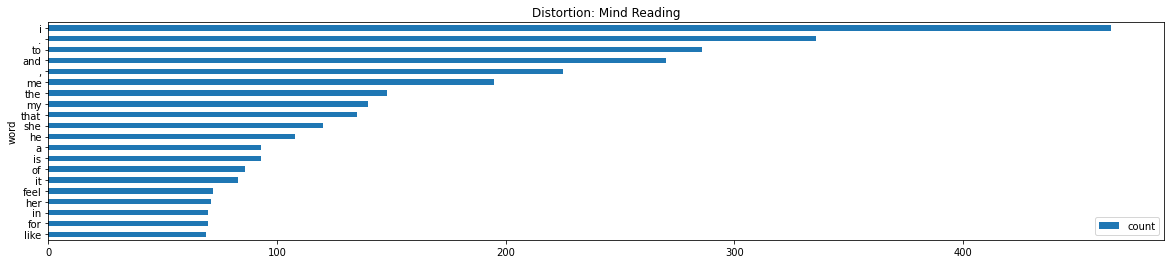

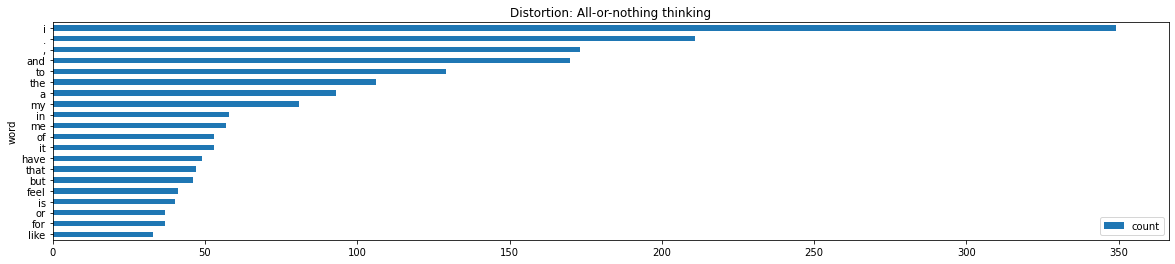

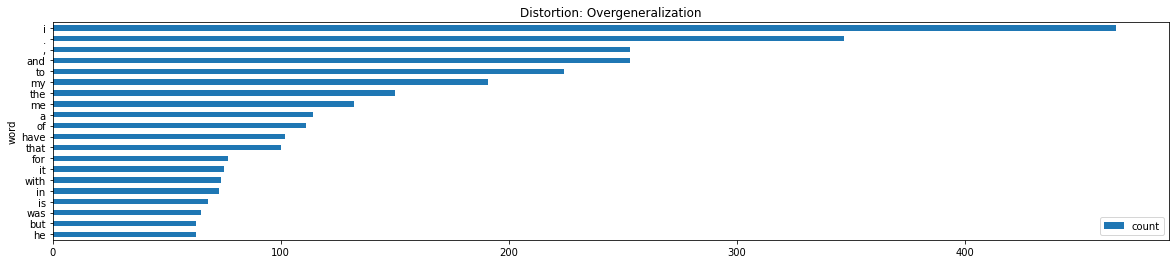

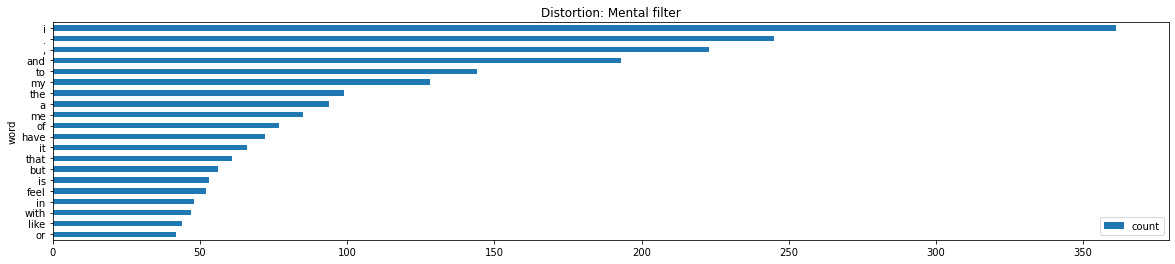

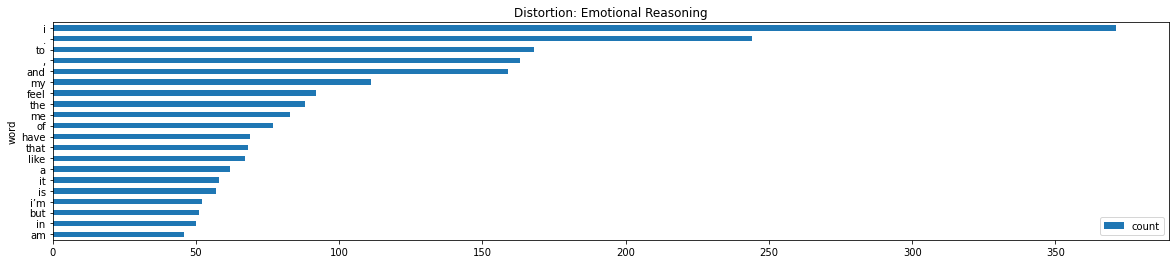

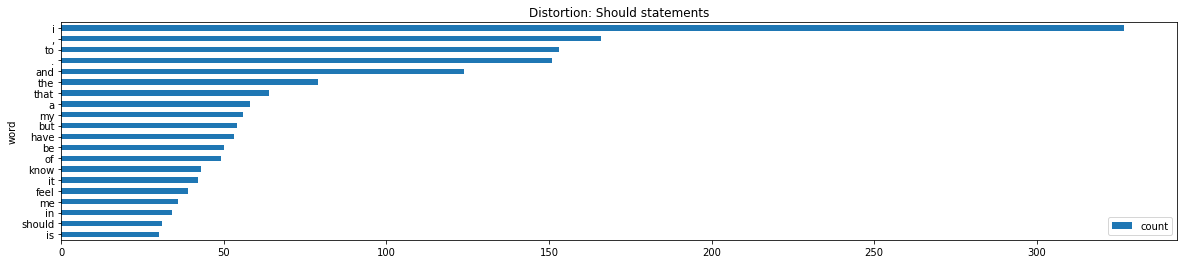

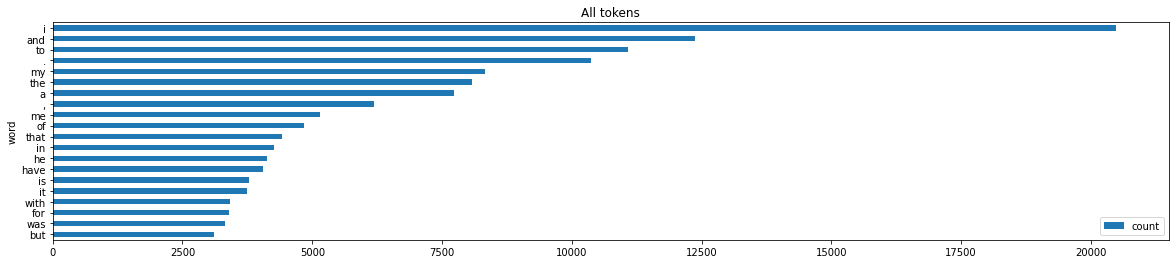

In [9]:
# Analyzing the frequency of words (tokens) for each cognitive distortion

from collections import defaultdict

all_distortions = defaultdict(int)

# Creating dictionaries for token counting
distortions_dicts = defaultdict(lambda: defaultdict(int))  # A separate dictionary is created for each distortion (distortion-token-token_frequency)
all_tokens_dict = defaultdict(int)  # A general dictionary of all tokens

# Manually define stop words (can be imported from the NLTK library)
# stop_words = {".", ","}

# Loop through the rows of the DataFrame
for _, row in df.iterrows():
    # Text definition: first, check the 2nd column; if NaN, take the text from the 1st column.
    text = row.iloc[1] if pd.notna(row.iloc[1]) else row.iloc[0]
    primary_distortion = row.iloc[2]  # The main cognitive distortion from the 3rd column
    secondary_distortion = row.iloc[3] if pd.notna(row.iloc[3]) else None  # The secondary distortion from the 4th column, if it exists

    dictcount(all_distortions,primary_distortion)
    if secondary_distortion:
        dictcount(all_distortions,secondary_distortion)
 
    # Text tokenization
    tokens = tokenize_re(text)

    # Remove stop words
    # filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_tokens = tokens

    dictcount(all_tokens_dict, filtered_tokens)  # Increment the counter in the general dictionary
    dictcount(distortions_dicts[primary_distortion], filtered_tokens)  # Increment the counter for the corresponding primary distortion
    if secondary_distortion:
        dictcount(distortions_dicts[secondary_distortion], filtered_tokens) # Increment the counter for the corresponding secondary distortion (if present)

#print("General dictionary of tokens:")
#print(dict(all_tokens_dict))

#print("\nDictionaries of tokens by distortions:")
#for distortion, tokens_dict in distortions_dicts.items():
#    print(f"Distortion '{distortion}':")
#    print(dict(tokens_dict))

# Displaying the results of word (token) frequency for each cognitive distortion

# Display graphs for all distortions
all_distortions[' '] = 0 # stub/hack
print(all_distortions)
plot_dict(
            all_distortions,
            labels="Distortion",
            values="count",
            title=f"All distortions",
            head=20             # All
    )

# Display graphs for each distortion
for distortion, tokens_dict in distortions_dicts.items():
    plot_dict(
        tokens_dict,
        labels="word",
        values="count",
        title=f"Distortion: {distortion}",
        head=20             # Top 20 words
    )


# Display a general graph for all tokens
plot_dict(
    all_tokens_dict,
    labels="word",
    values="count",
    title="All tokens",
    head=20                # Top 20 words
)


## Define working functions to be moved to the code module

In [10]:
# Analyze the frequency of n-grams for each cognitive distortion

from pygents.aigents_api import build_ngrams

def count_ngrams_basic(df, n_max: int):

    distortions = defaultdict(int)

    # Creating dictionaries for counting n-grams
    n_gram_dicts = defaultdict(lambda: defaultdict(int))  # A dictionary for each distortion (distortion-n-gram-n_gram_frequency)
    all_n_grams = defaultdict(int)  # A general dictionary for all n-grams
    
    uniq_n_gram_dicts = defaultdict(lambda: defaultdict(int)) # Counts of uniq N-grams by Distortion
    uniq_all_n_grams = defaultdict(int)  # A general dictionary for all n-grams uniq by text
    n_gram_distortions = defaultdict(lambda: defaultdict(int)) # Counts of distortiions by N-gram

    # Loop through the rows of the DataFrame
    for _, row in df.iterrows():
        # Text identification: first, check the 2nd column; if NaN, take the text from the 1st column
        text = row.iloc[1] if pd.notna(row.iloc[1]) else row.iloc[0]
        primary_distortion = row.iloc[2]  # The primary cognitive distortion from the 3rd column
        secondary_distortion = row.iloc[3] if pd.notna(row.iloc[3]) else None  # The secondary distortion from the 4th column, if present

        dictcount(distortions,primary_distortion)
        if secondary_distortion:
            dictcount(distortions,secondary_distortion)
        
        # Text tokenization
        tokens = tokenize_re(text)

        # Generation and counting of n-grams (from 1 to 4)
        for n in range(1, n_max + 1):
            n_grams = build_ngrams(tokens, n)
            dictcount(all_n_grams, n_grams)
            dictcount(n_gram_dicts[primary_distortion], n_grams)  # Increment the counter for the corresponding primary distortion
            if secondary_distortion:
                dictcount(n_gram_dicts[secondary_distortion], n_grams) # Increment the counter for the corresponding secondary distortion (if present)

            uniq_n_grams = set(n_grams)
            for uniq_n_gram in uniq_n_grams:
                dictcount(uniq_n_gram_dicts[primary_distortion], uniq_n_gram)
                dictcount(uniq_all_n_grams, uniq_n_gram)
                dictcount(n_gram_distortions[uniq_n_gram],primary_distortion)
                if secondary_distortion:
                    dictcount(uniq_n_gram_dicts[secondary_distortion], uniq_n_gram)
                    dictcount(n_gram_distortions[uniq_n_gram],secondary_distortion)
                
    # Normalizing distortion-specific counts by total counts
    norm_n_gram_dicts = {}
    for n_gram_dict in n_gram_dicts:
        norm_n_gram_dict = {}
        norm_n_gram_dicts[n_gram_dict] = norm_n_gram_dict
        dic = n_gram_dicts[n_gram_dict]
        for n_gram in dic:
            #print(dic[n_gram])
            #print(all_n_grams[n_gram])
            #break
            if len(n_gram) <= n_max:
                norm_n_gram_dict[n_gram] = float( dic[n_gram] ) / all_n_grams[n_gram]

    # Normalize uniq counts 
    norm_uniq_n_gram_dicts = {}
    for uniq_n_gram_dict in uniq_n_gram_dicts:
        norm_uniq_n_gram_dict = {}
        norm_uniq_n_gram_dicts[uniq_n_gram_dict] = norm_uniq_n_gram_dict
        dic = uniq_n_gram_dicts[uniq_n_gram_dict]
        nonuniq_dic = n_gram_dicts[n_gram_dict]
        # Normalize uniq Document counts of N-grams by distortion by Documents count by Distortion
        for n_gram in dic:
            if len(n_gram) <= n_max:
                #norm_uniq_n_gram_dict[n_gram] = float( dic[n_gram] ) * nonuniq_dic[n_gram] / distortions[uniq_n_gram_dict] / len(n_gram_distortions[n_gram]) / all_n_grams[n_gram]
                norm_uniq_n_gram_dict[n_gram] = float( dic[n_gram] ) / distortions[uniq_n_gram_dict] / len(n_gram_distortions[n_gram])
 
    n_gram_distortions_counts = {}
    for n_gram, dist_dict in n_gram_distortions.items():
        n_gram_distortions_counts[n_gram] = len(dist_dict)
    n_gram_distortions_counts

    return distortions, n_gram_dicts, all_n_grams, norm_n_gram_dicts, uniq_n_gram_dicts, uniq_all_n_grams, n_gram_distortions, norm_uniq_n_gram_dicts, n_gram_distortions_counts
                

In [11]:
# distortions # counts of category instances
# n_gram_dicts # counts of N-grams by distortion
# all_n_grams # counts of N-grams
# norm_n_gram_dicts # TBD
# uniq_n_gram_dicts # uniq counts of N-grams by distortion
# uniq_all_n_grams # uniq counts of N-grams
# n_gram_distortions # distortions by N-gram
# n_gram_distortions_counts # counts of distortions by N-gram

In [12]:
def plot_debug_charts(distortions, n_gram_dicts, all_n_grams, norm_n_gram_dicts, n_top):
    # Display graphs for all distortions
    if len(distortions) < 3: #stub/fix/hack
           distortions[' '] = 0
    plot_dict(
            distortions,
            labels="Distortion",
            values="count",
            title=f"All distortions",
            head=n_top             # All
        )
    # Display graphs for each distortion
    plot_dict(
            all_n_grams,
            labels="word",
            values="count",
            title=f"All",
            head=n_top             # All
        )
    for distortion, ngram_dict in n_gram_dicts.items():
        plot_dict(
            ngram_dict,
            labels="word",
            values="count",
            title=f"Distortion: {distortion}",
            head=n_top             # Top 20 n-grams
        )
    # Display graphs for each distortion
    for distortion, ngram_dict in norm_n_gram_dicts.items():
        plot_dict(
            ngram_dict,
            labels="word",
            values="count",
            title=f"Normalized Distortion: {distortion}",
            head=n_top             # Top 20 n-grams
        )

In [13]:
distortions, n_gram_dicts, all_n_grams, norm_n_gram_dicts, uniq_n_gram_dicts, uniq_all_n_grams, n_gram_distortions, \
norm_uniq_n_gram_dicts, n_gram_distortions_counts \
= count_ngrams_basic(df,3)

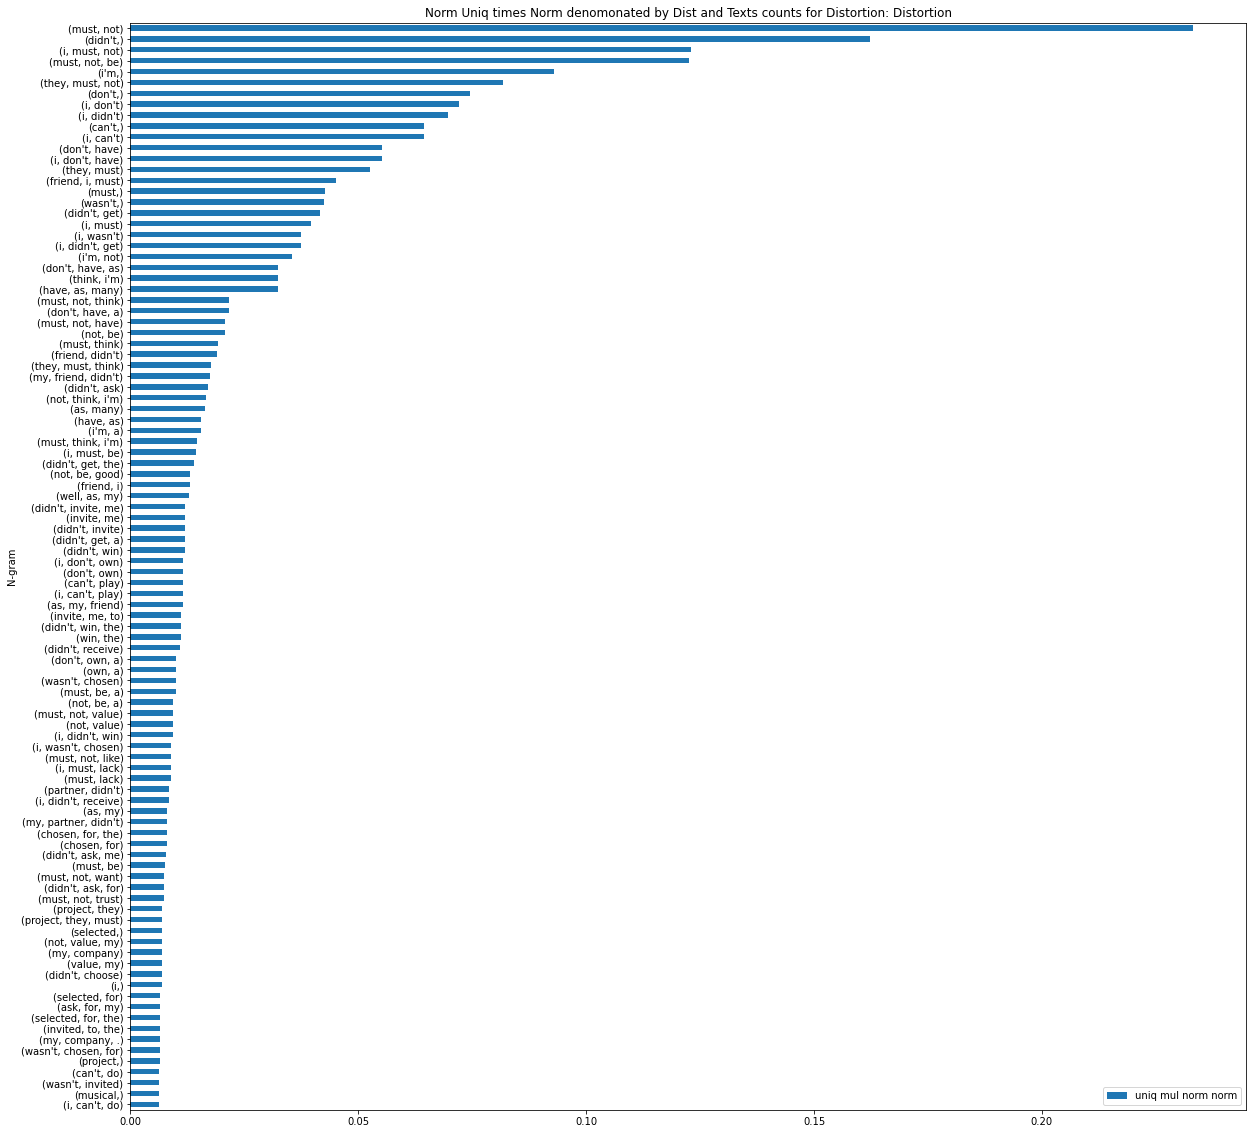

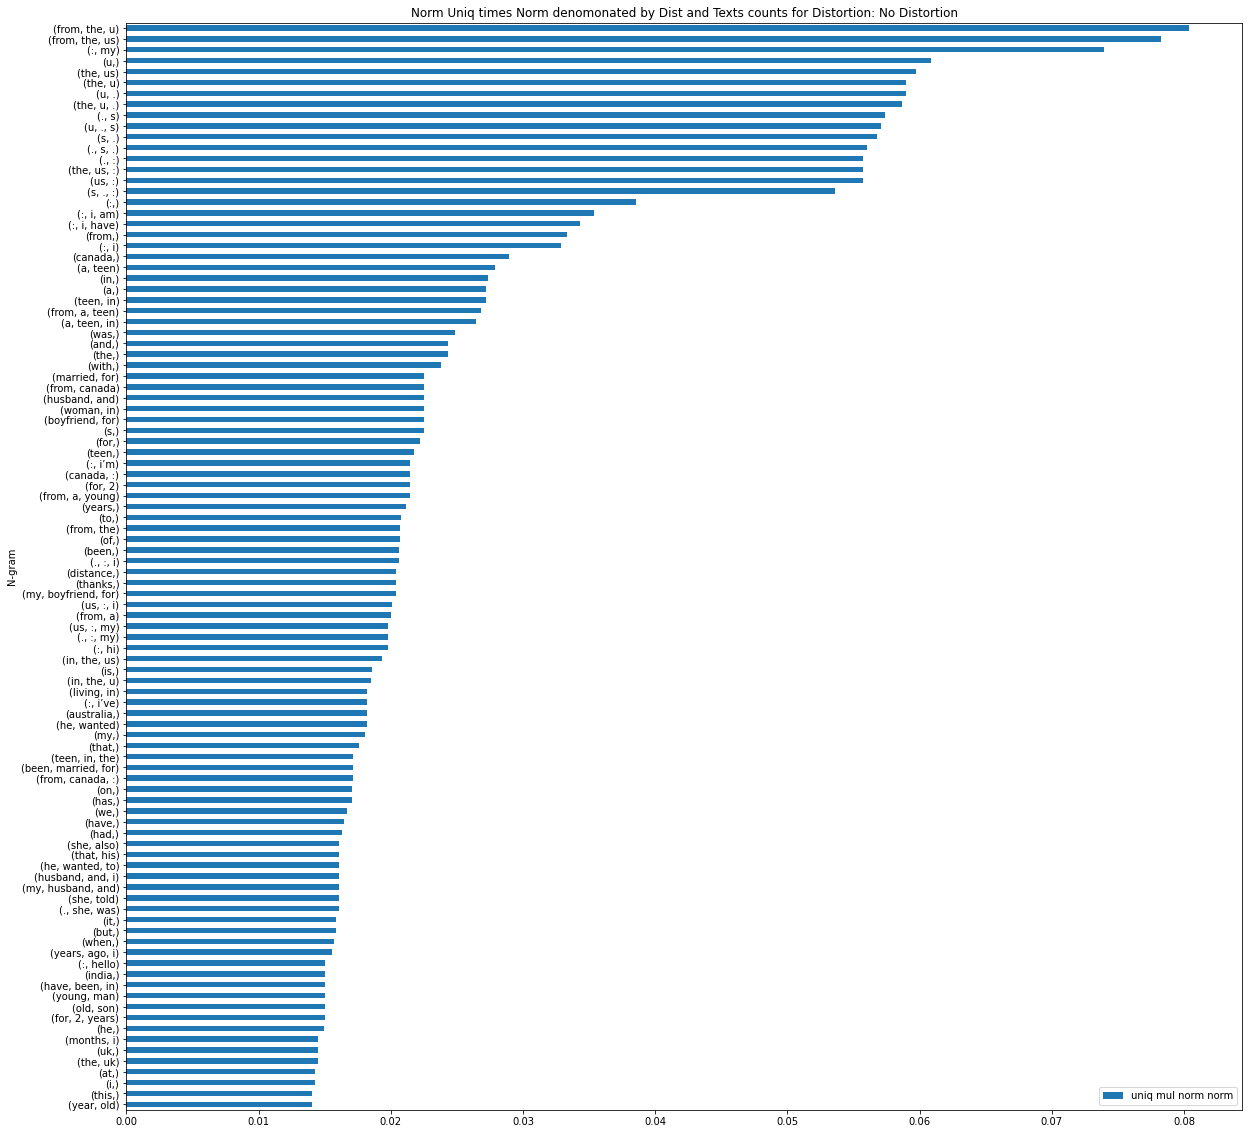

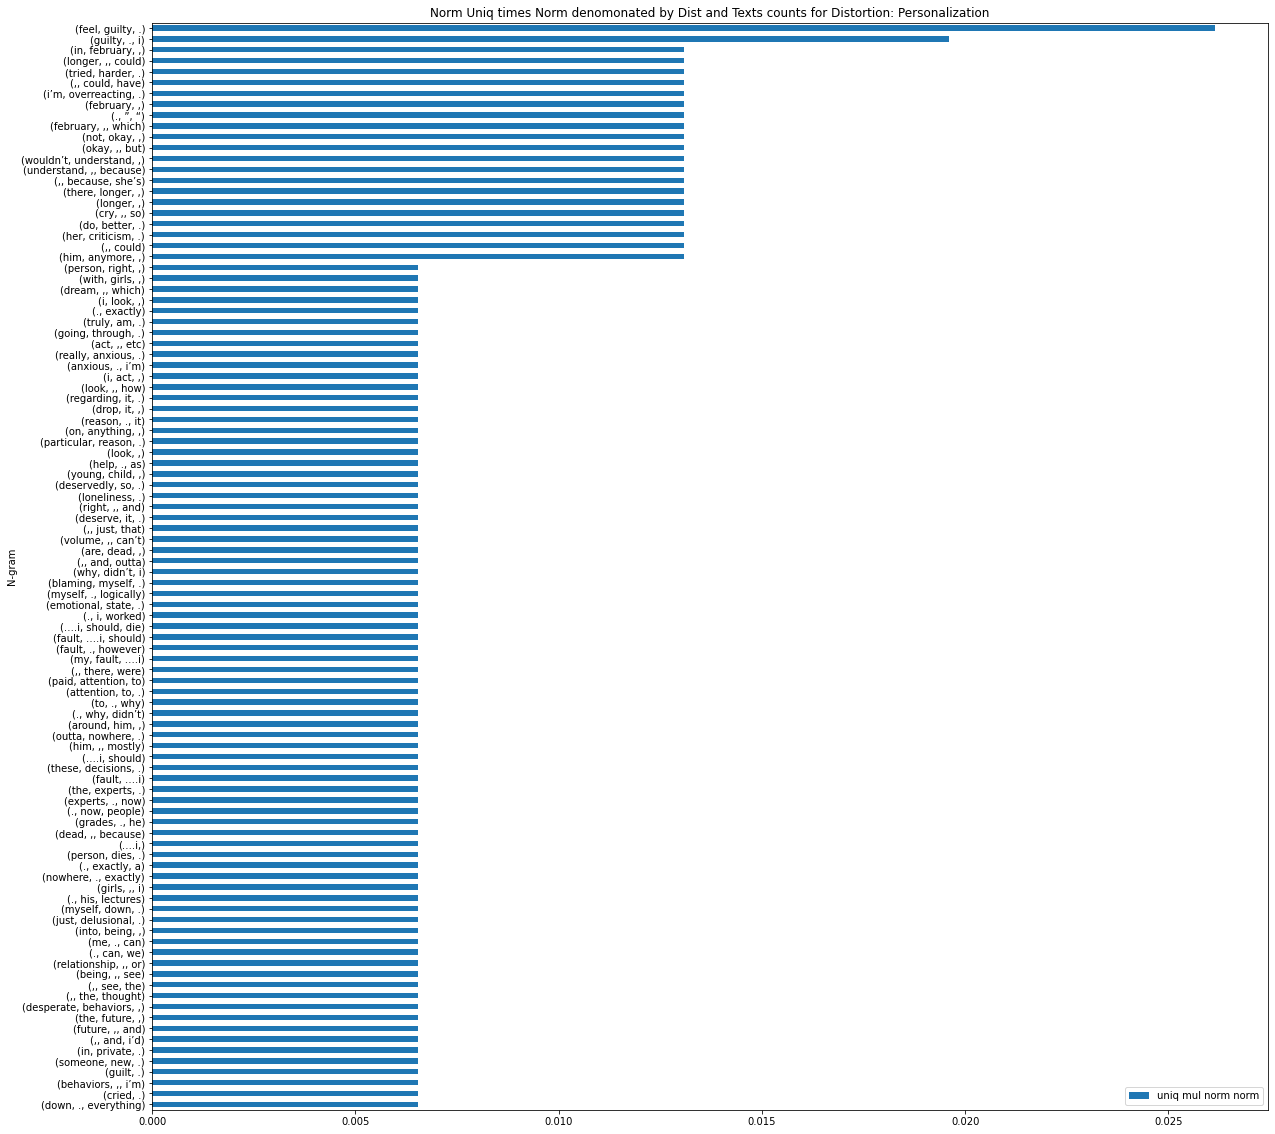

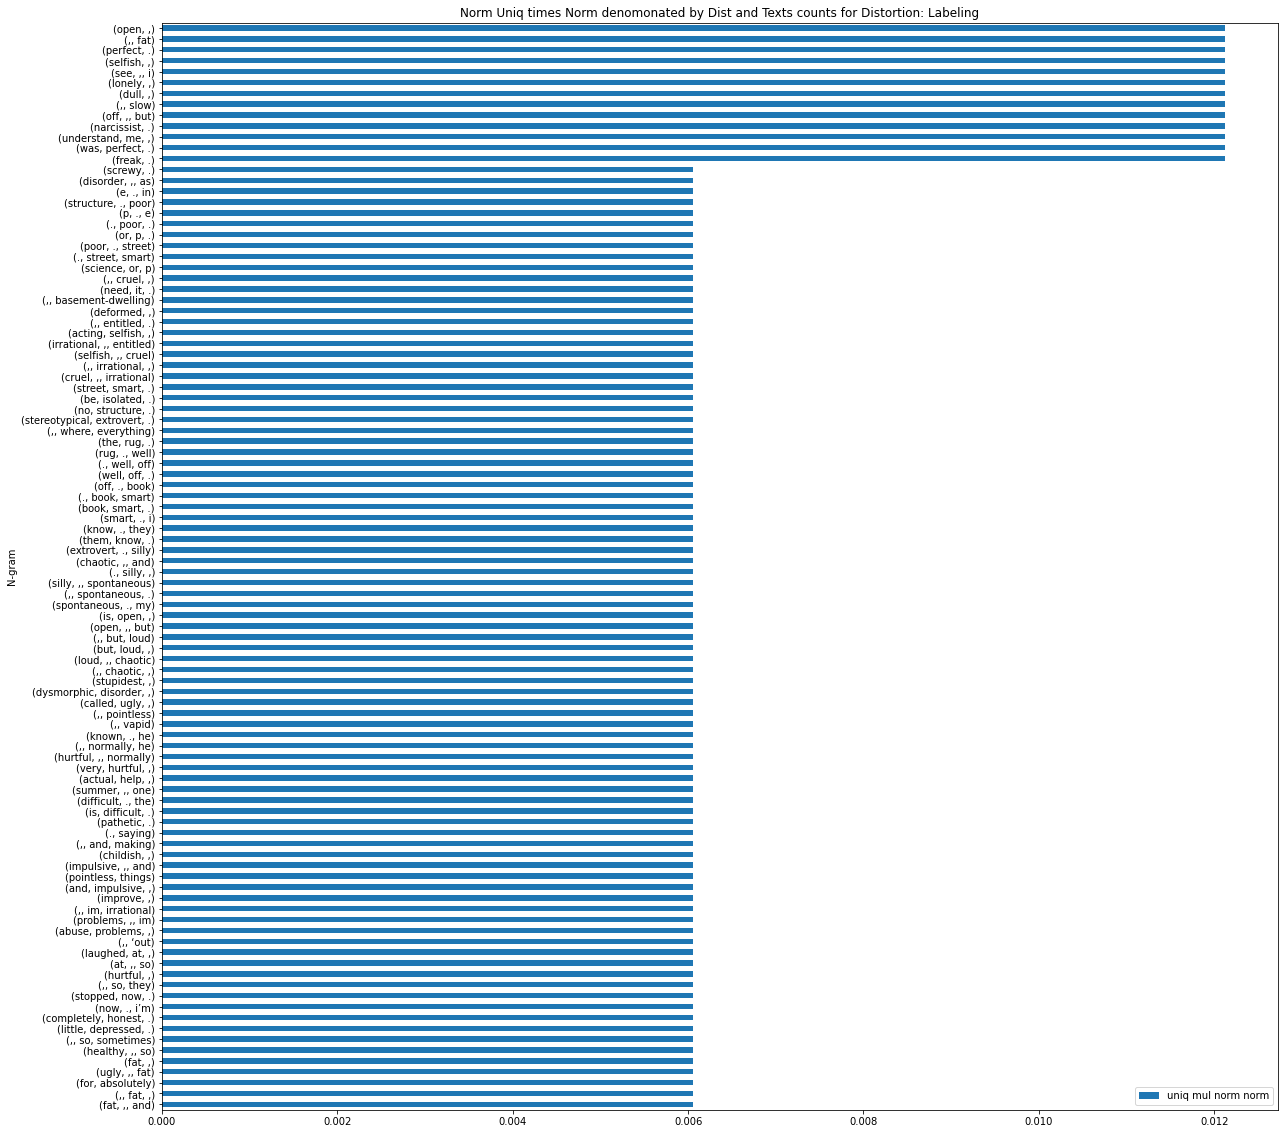

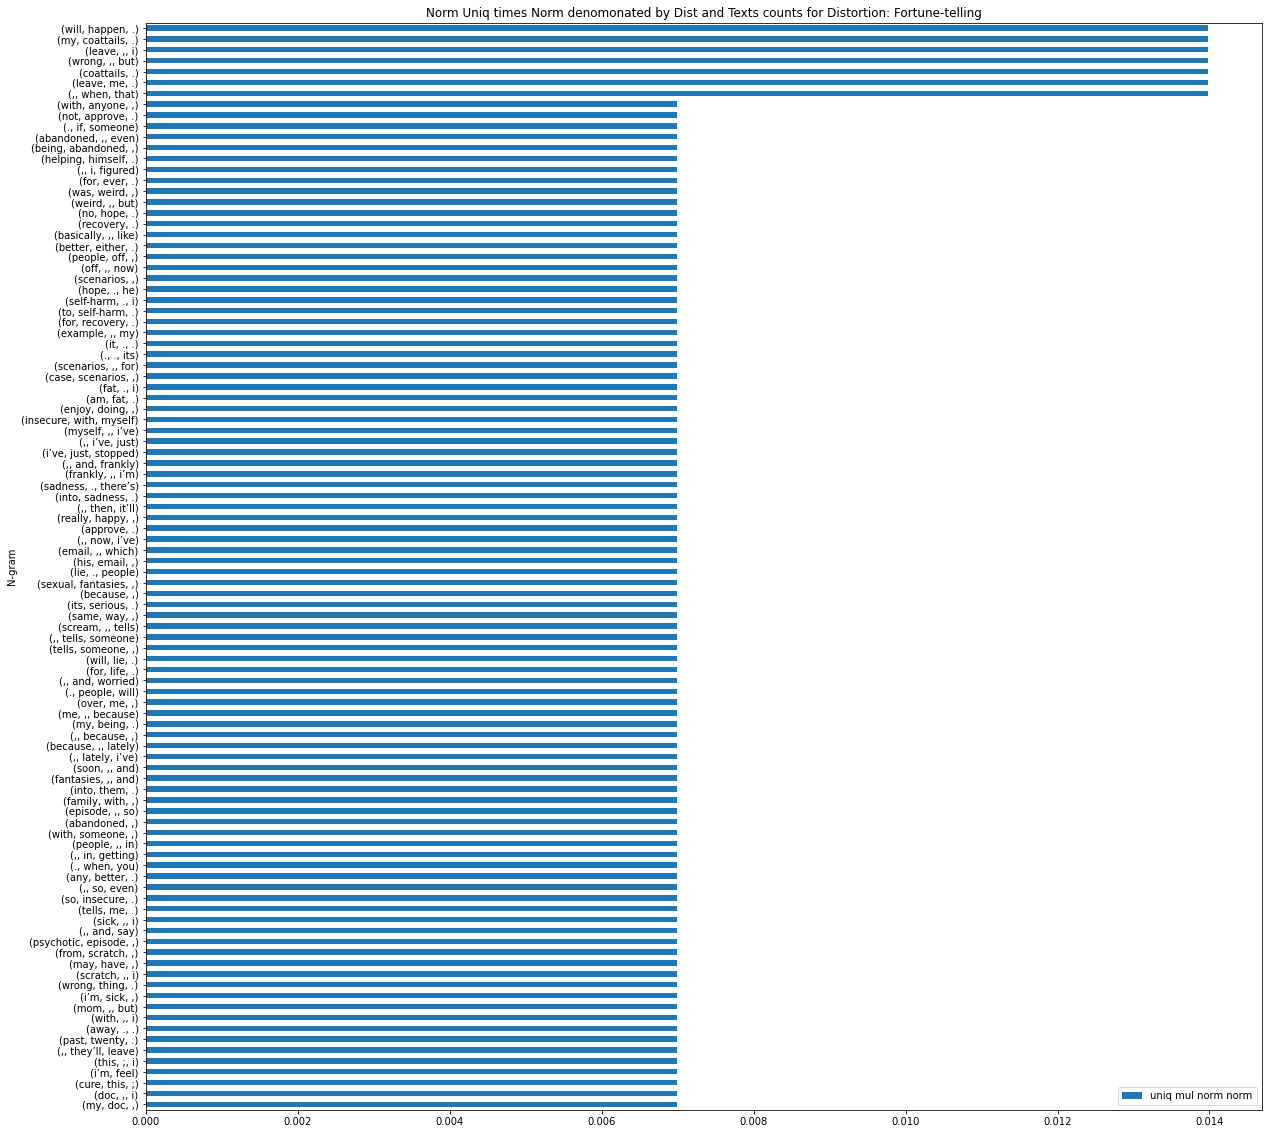

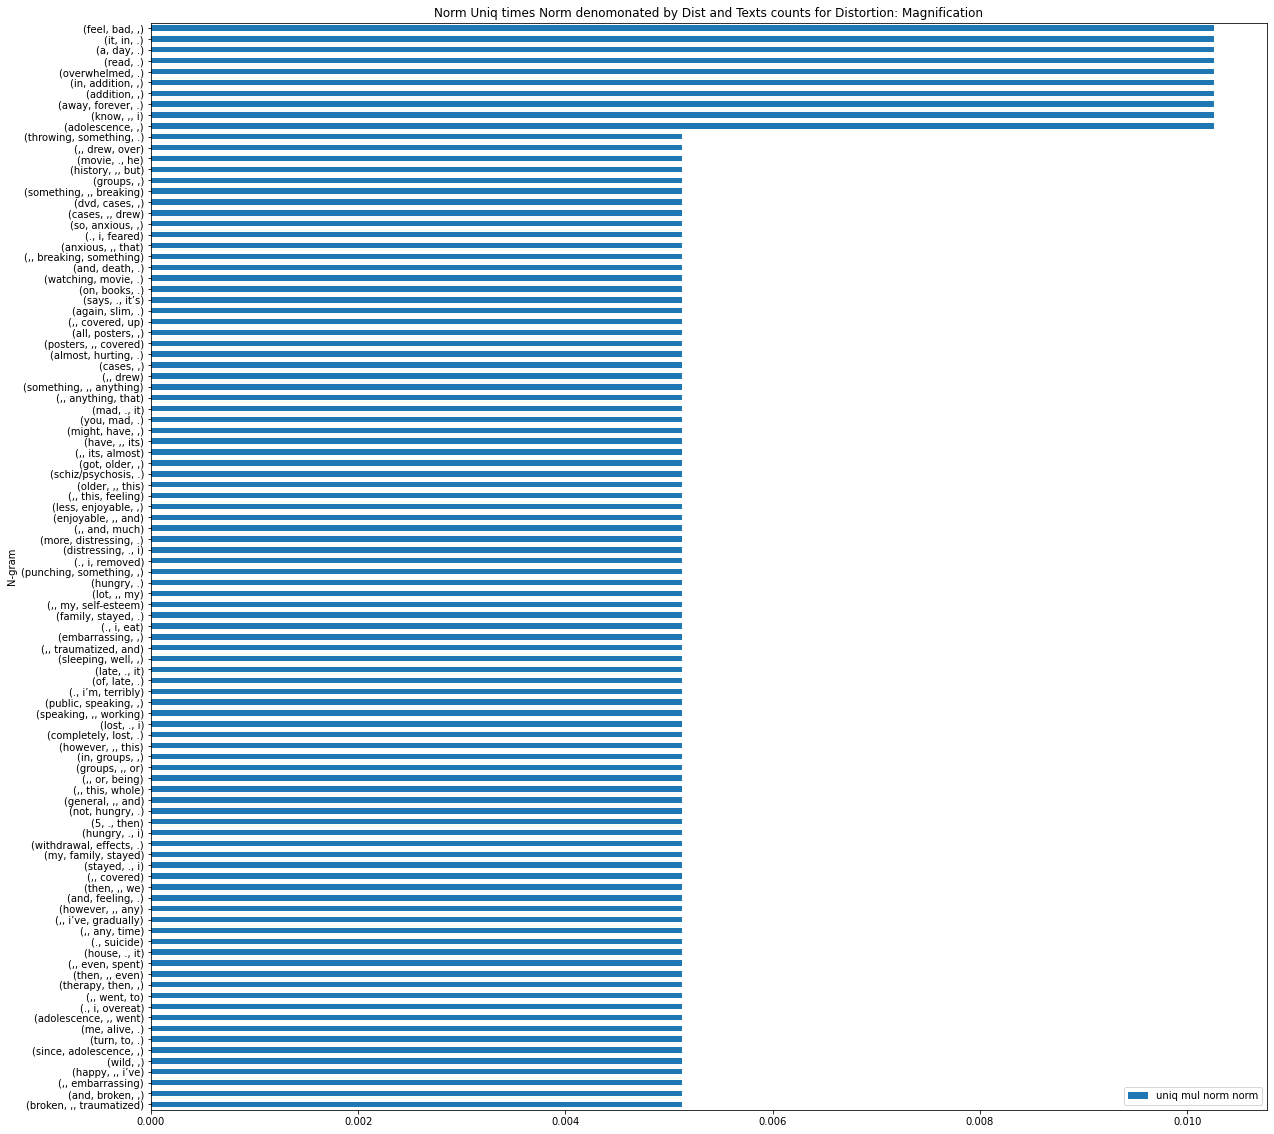

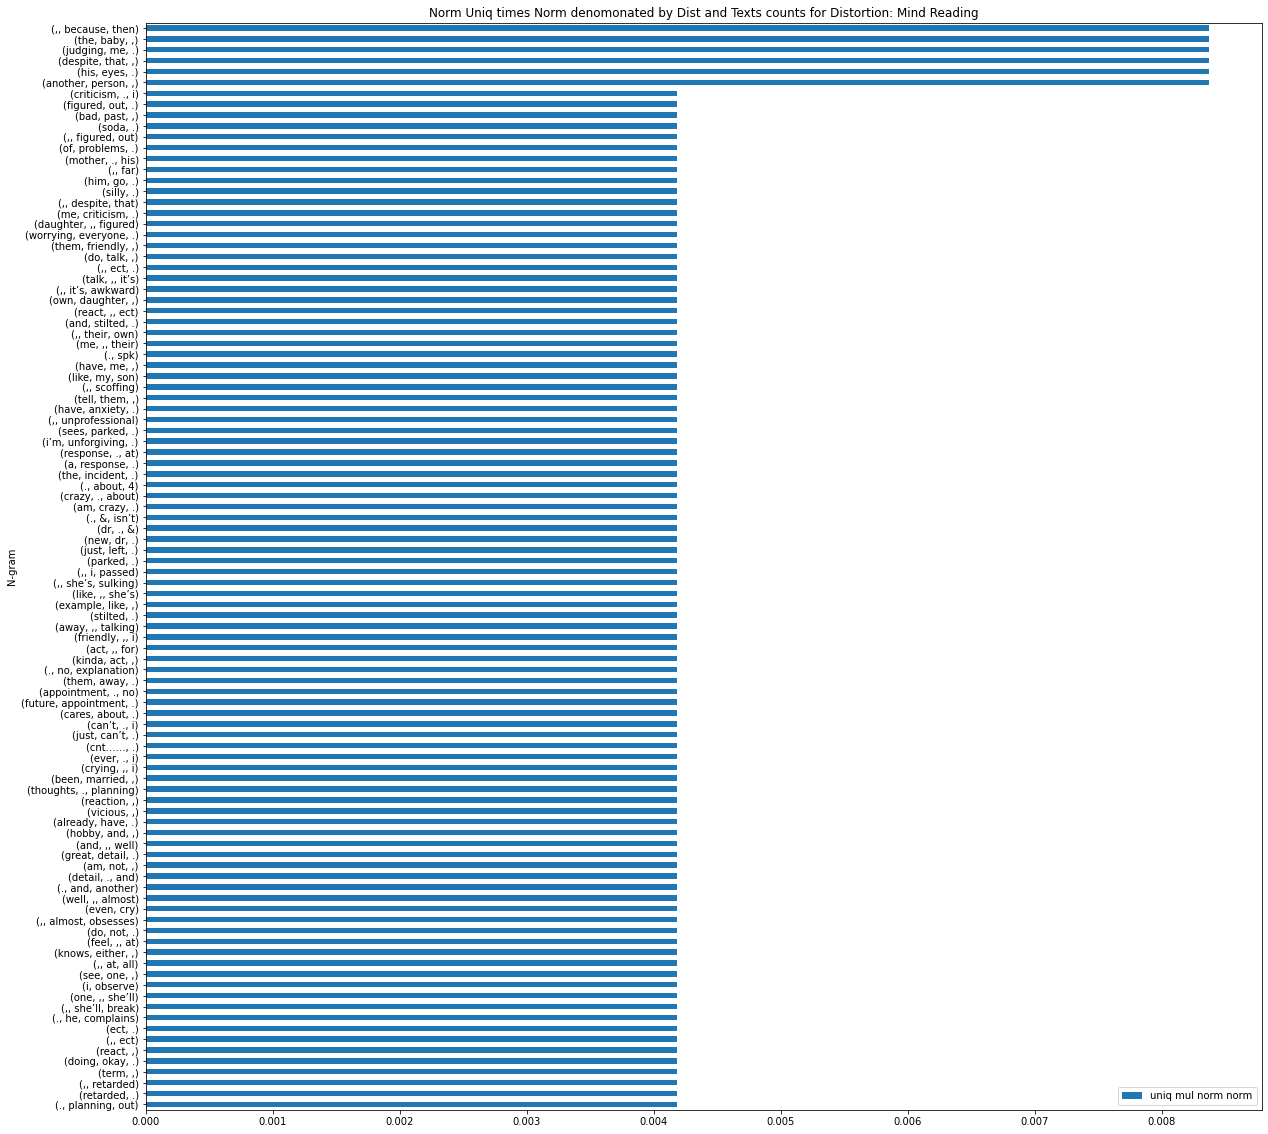

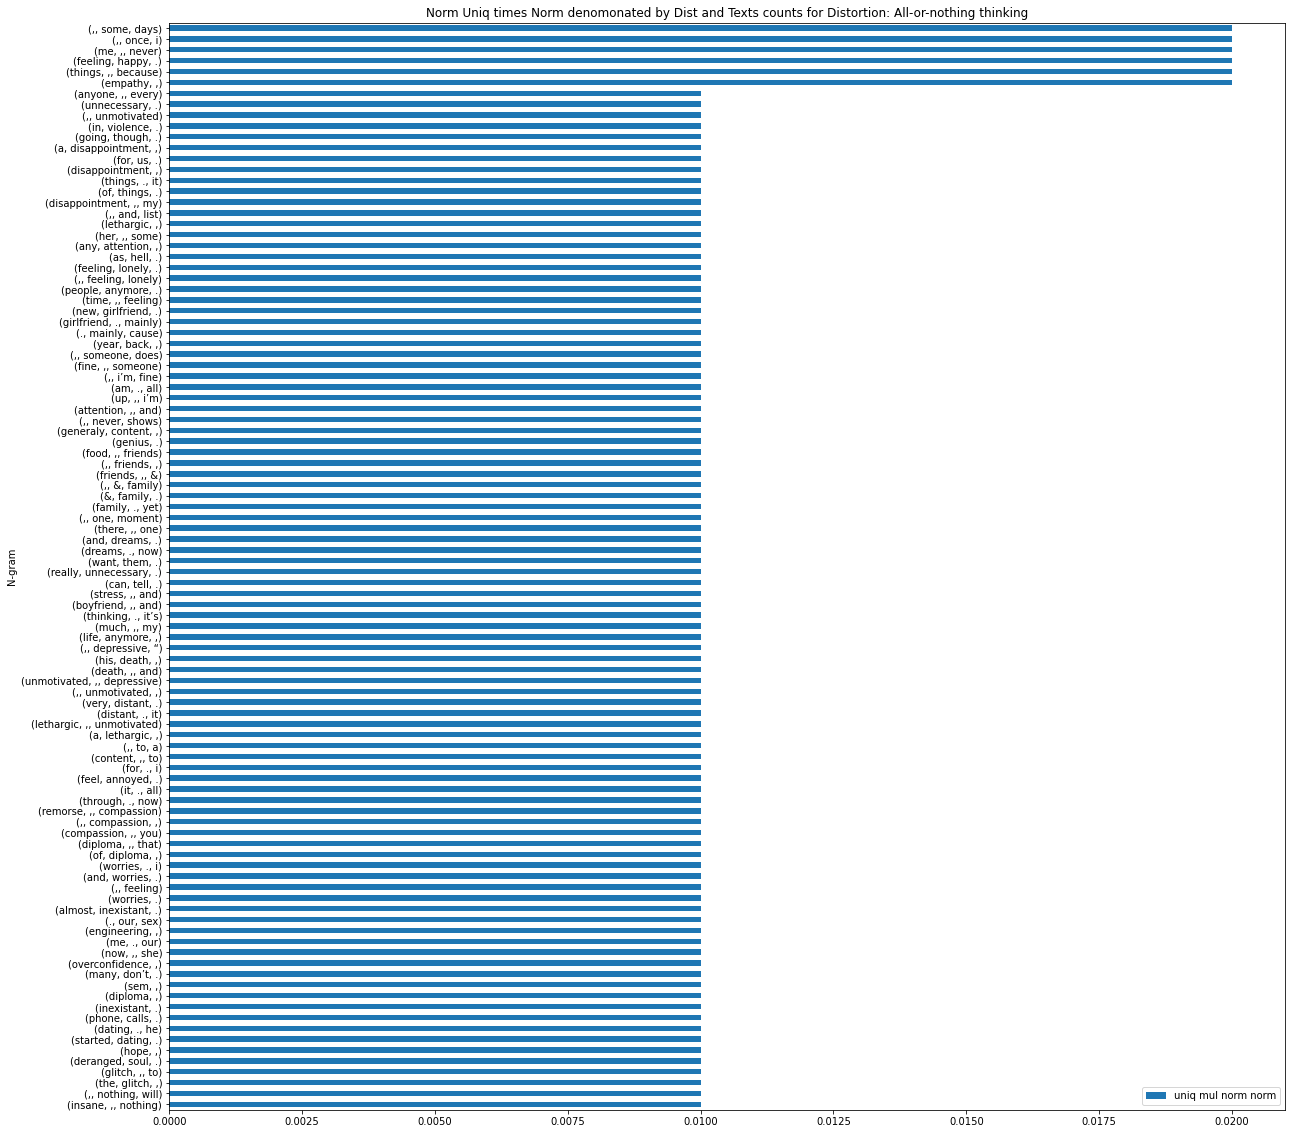

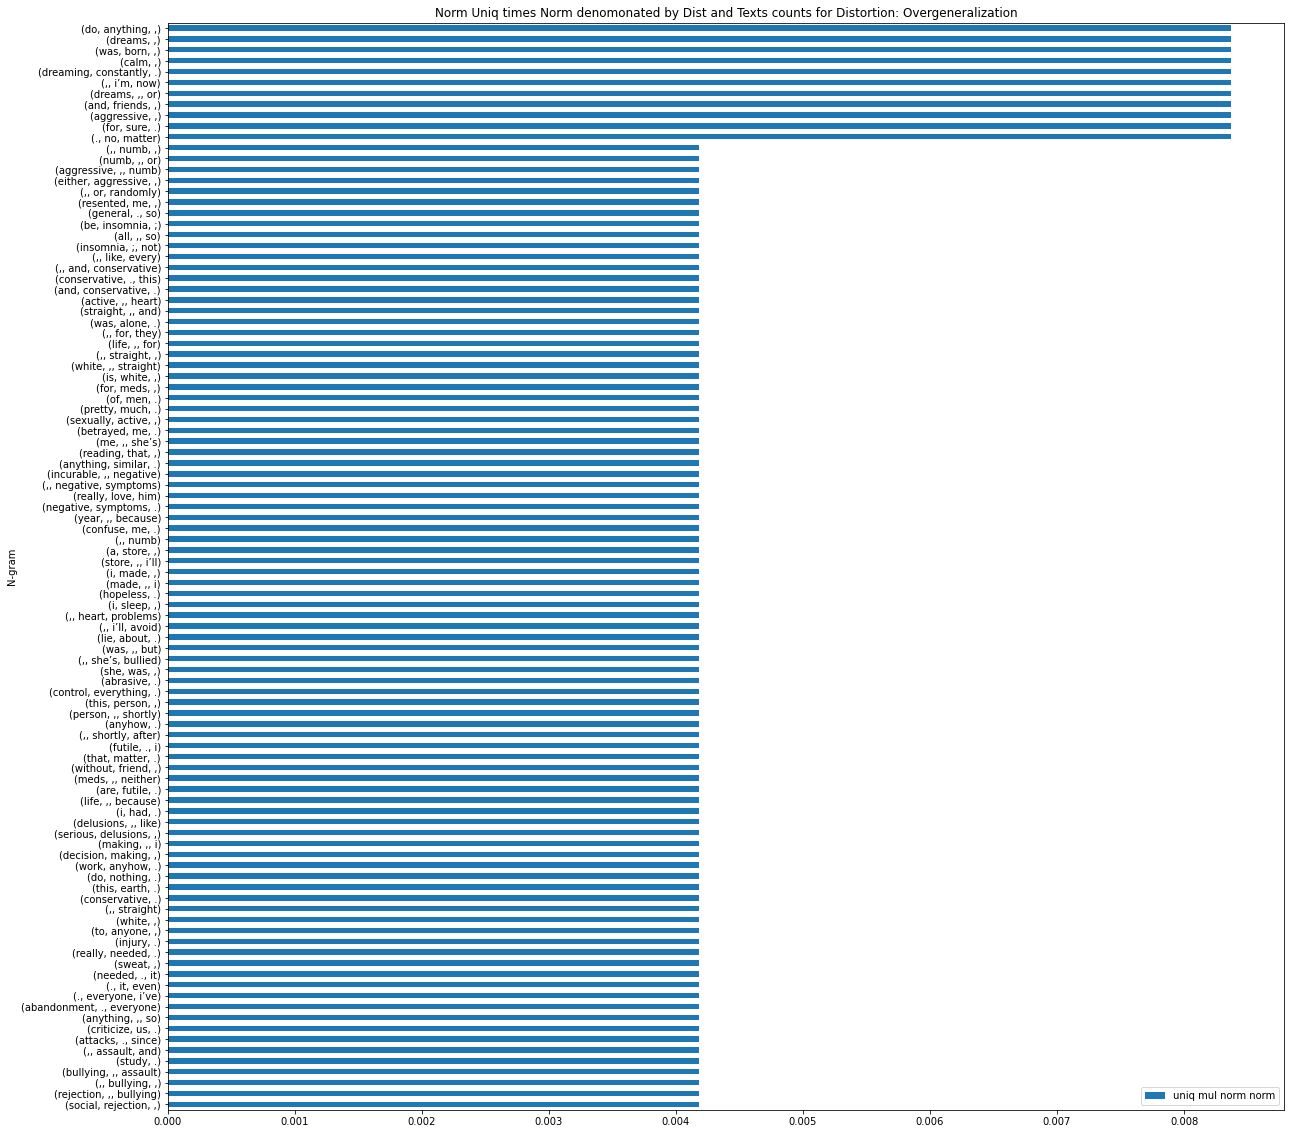

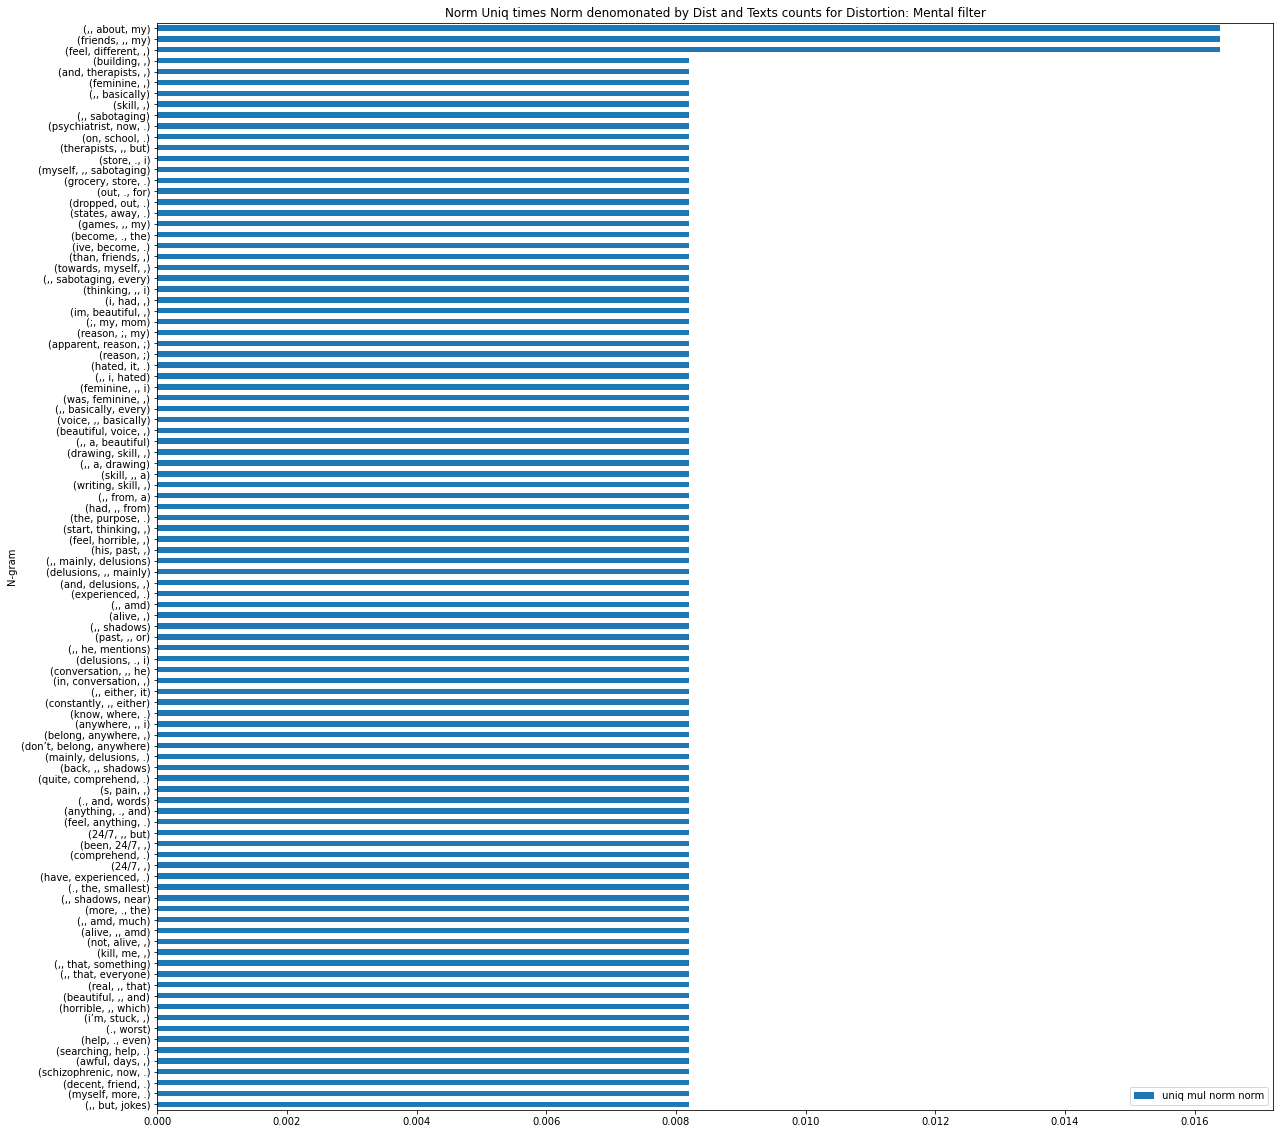

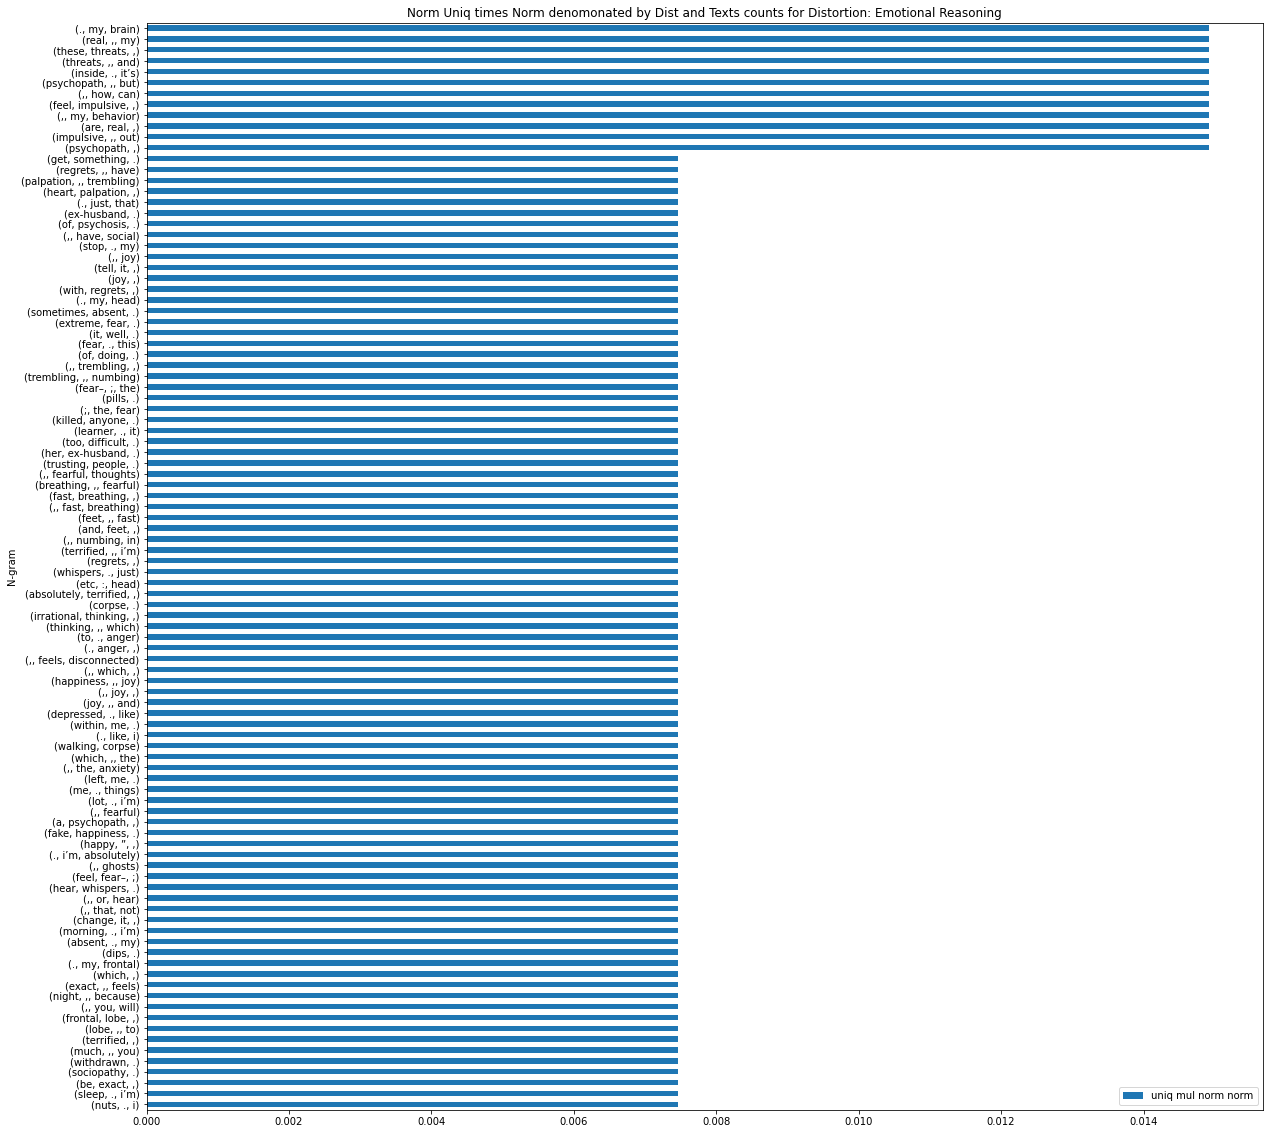

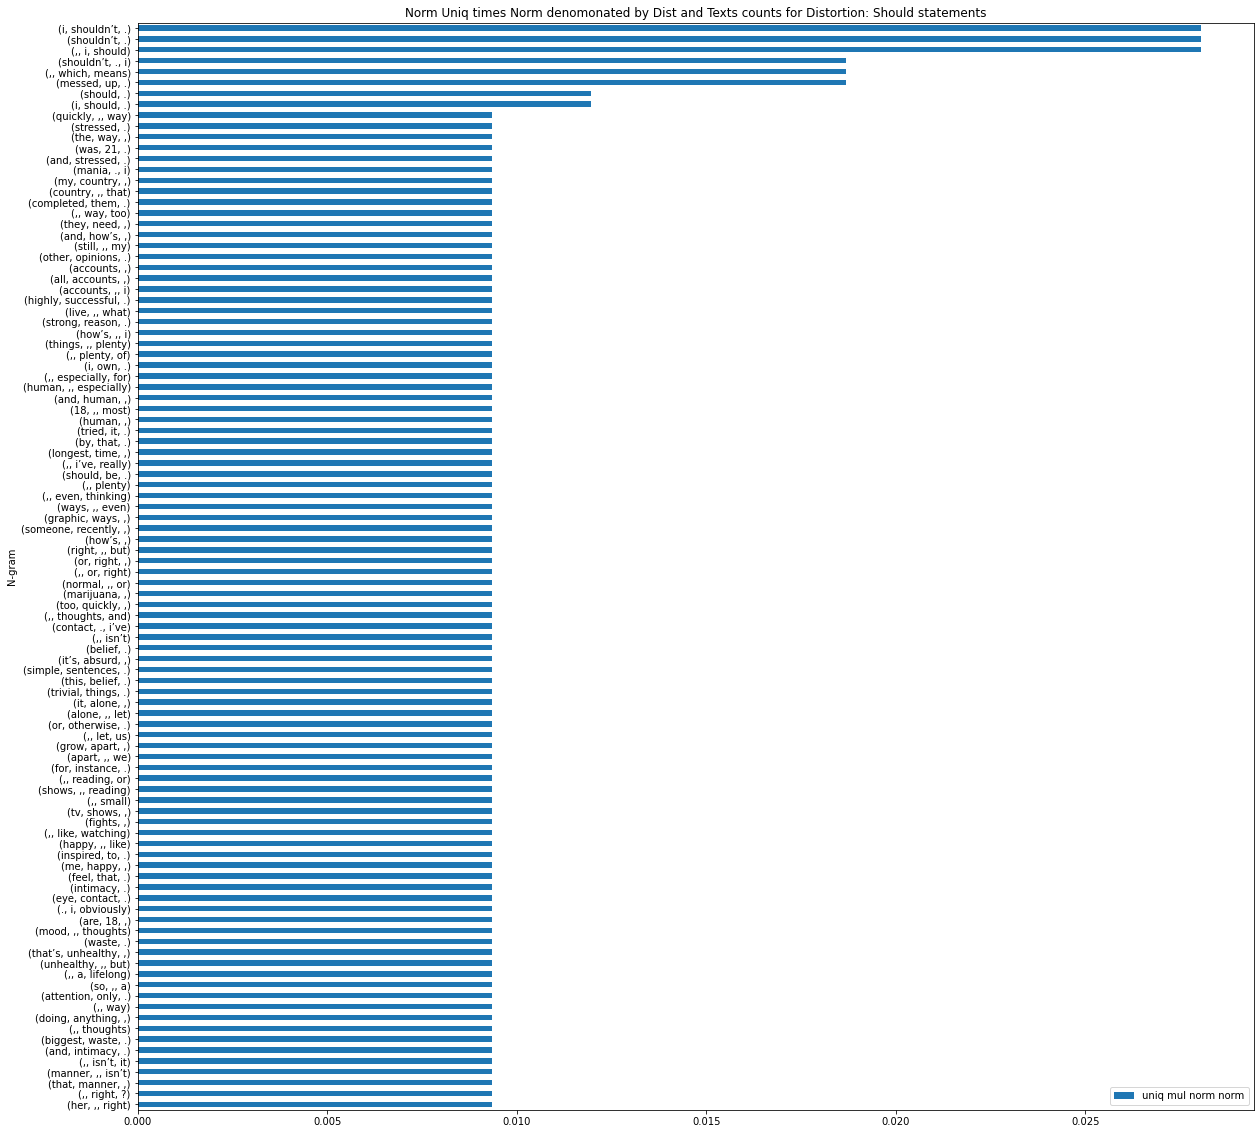

In [14]:
norm = dictdict_div_dict(n_gram_dicts,all_n_grams)
norm_uniq = dictdict_div_dict(uniq_n_gram_dicts,uniq_all_n_grams)
norm_norm_uniq = dictdict_mul_dictdict(norm,norm_uniq)
norm_norm_uniq_norm = dictdict_div_dict(norm_norm_uniq,n_gram_distortions_counts)

norm_norm_uniq_norm_norm = {} # looks like desired magic
for dist in distortions:
    if not dist in norm_norm_uniq_norm: #hack
        continue
    dic = norm_norm_uniq_norm[dist]
    norm_norm_uniq_norm_norm[dist] = {}
    for n_gram in dic:
        norm_norm_uniq_norm_norm[dist][n_gram] = dic[n_gram] * n_gram_distortions[n_gram][dist] / distortions[dist]
"""
for distortion, ngram_dict in norm_uniq.items():
    plot_dict(ngram_dict,labels="N-gram",values="norm",head=50,title=f"Norm counts for Distortion: {distortion}")
for distortion, ngram_dict in norm_uniq.items():
    plot_dict(ngram_dict,labels="N-gram",values="uniq norm",head=50,title=f"Norm Uniq counts for Distortion: {distortion}")
for distortion, ngram_dict in norm_norm_uniq.items():
    plot_dict(ngram_dict,labels="N-gram",values="uniq mul norm",head=50,title=f"Norm Uniq times Norm counts for Distortion: {distortion}")
for distortion, ngram_dict in norm_norm_uniq_norm.items():
    plot_dict(ngram_dict,labels="N-gram",values="uniq mul norm norm",head=100,title=f"Norm Uniq times Norm counts by Dist counts for Distortion: {distortion}")
"""
for distortion, ngram_dict in norm_norm_uniq_norm_norm.items():
    plot_dict(ngram_dict,labels="N-gram",values="uniq mul norm norm",head=100,title=f"Norm Uniq times Norm denomonated by Dist and Texts counts for Distortion: {distortion}")


### Local threshold cutoff

In [31]:
print('Local threshold cutoffs')
for t in [r/10 for r in range(1,9,2)]:
    print(t)
    for distortion, ngram_dict in norm_norm_uniq_norm_norm.items():
        if distortion != 'No Distortion':
            c = dict(ngram_dict)
            c = dict_compress_with_loss(c,t)
            print(distortion,len(ngram_dict),len(c))
    print()


Local threshold cutoffs
0.1
Distortion 87843 25
Personalization 11159 691
Labeling 11956 1217
Fortune-telling 8842 583
Magnification 15465 1146
Mind Reading 14623 868
All-or-nothing thinking 8901 724
Overgeneralization 14174 1003
Mental filter 10214 767
Emotional Reasoning 9140 657
Should statements 7197 503

0.3
Distortion 87843 8
Personalization 11159 22
Labeling 11956 1158
Fortune-telling 8842 474
Magnification 15465 1095
Mind Reading 14623 766
All-or-nothing thinking 8901 650
Overgeneralization 14174 945
Mental filter 10214 740
Emotional Reasoning 9140 603
Should statements 7197 502

0.5
Distortion 87843 4
Personalization 11159 22
Labeling 11956 1158
Fortune-telling 8842 474
Magnification 15465 1094
Mind Reading 14623 765
All-or-nothing thinking 8901 650
Overgeneralization 14174 944
Mental filter 10214 740
Emotional Reasoning 9140 603
Should statements 7197 6

0.7
Distortion 87843 1
Personalization 11159 2
Labeling 11956 13
Fortune-telling 8842 7
Magnification 15465 10
Mind Reading

### Global threshold cutoff

In [29]:
def dict_compress_with_loss_abs(dic,threshold=0.01):
    todo = []
    for d in dic:
            if dic[d] < threshold:
                 todo.append(d)
    for d in todo:
            del dic[d]
    return dic

maxval = 0
for distortion, ngram_dict in norm_norm_uniq_norm_norm.items():
    if distortion == 'No Distortion':
        continue
    for key, val in ngram_dict.items():
        if maxval < val:
            maxval = val
print(maxval)

print('Local threshold cutoffs')
for t in [r/100 for r in range(1,6,1)]:
    print(t)
    for distortion, ngram_dict in norm_norm_uniq_norm_norm.items():
            if key == 'No Distortion':
                continue
            c = dict(ngram_dict)
            c = dict_compress_with_loss_abs(c,maxval * 0.01)
            print(distortion,len(ngram_dict),len(c))
    print()

# 0.01 to start
# 0.05 looks like max


0.23323053199691596
Local threshold cutoffs
0.01
Distortion 87843 316
No Distortion 180005 5141
Personalization 11159 695
Labeling 11956 1166
Fortune-telling 8842 480
Magnification 15465 1096
Mind Reading 14623 766
All-or-nothing thinking 8901 724
Overgeneralization 14174 945
Mental filter 10214 744
Emotional Reasoning 9140 609
Should statements 7197 527

0.02
Distortion 87843 316
No Distortion 180005 5141
Personalization 11159 695
Labeling 11956 1166
Fortune-telling 8842 480
Magnification 15465 1096
Mind Reading 14623 766
All-or-nothing thinking 8901 724
Overgeneralization 14174 945
Mental filter 10214 744
Emotional Reasoning 9140 609
Should statements 7197 527

0.03
Distortion 87843 316
No Distortion 180005 5141
Personalization 11159 695
Labeling 11956 1166
Fortune-telling 8842 480
Magnification 15465 1096
Mind Reading 14623 766
All-or-nothing thinking 8901 724
Overgeneralization 14174 945
Mental filter 10214 744
Emotional Reasoning 9140 609
Should statements 7197 527

0.04
Distortio

In [32]:
norm_norm_uniq_norm_norm['Distortion']

{("i'm",): 0.09290670778720124,
 ('such',): 7.34383795882452e-05,
 ('a',): 0.001471405344274401,
 ('failure',): 0.0005874362080992766,
 ('i',): 0.0068804381813162485,
 ('never',): 0.00017849929119567558,
 ('do',): 0.00039836733582361545,
 ('anything',): 0.00025019759095039855,
 ('right',): 7.786206967766572e-05,
 ('.',): 0.0008931999486794302,
 ("i'm", 'such'): 0.0015420200462606013,
 ('such', 'a'): 9.915589895576445e-05,
 ('a', 'failure'): 0.0006585790014677014,
 ('failure', 'i'): 0.00038550501156515033,
 ('i', 'never'): 4.6613501497907535e-05,
 ('never', 'do'): 6.0829193146374814e-06,
 ('do', 'anything'): 9.573347101447609e-05,
 ('anything', 'right'): 0.000491715575975957,
 ('right', '.'): 9.51864226086791e-06,
 ("i'm", 'such', 'a'): 0.001156515034695451,
 ('such', 'a', 'failure'): 0.00017133556069562236,
 ('a', 'failure', 'i'): 0.00038550501156515033,
 ('failure', 'i', 'never'): 0.00038550501156515033,
 ('i', 'never', 'do'): 2.1416945086952795e-05,
 ('never', 'do', 'anything'): 7.71

In [36]:
dic = norm_norm_uniq_norm_norm['Distortion']

with open("test.txt", "w") as f:
    for ngram, value in dic.items():
        ntext = " ".join(ngram)
        f.write(f"{ntext}\t{value}\n")


In [40]:
def load_ngrams_1(file,encoding=None,debug=False):
    if file.lower().startswith('http'):
        lines = url_lines(file)
        if debug:
            print(lines[:100])
            print(len(lines))
    else:
        if encoding is None:
            with open(file) as f:
                lines = f.readlines()
        else:
            with open(file,encoding=encoding) as f:
                lines = f.readlines()
    ngrams = [tuple(l.split('\t')[0].split()) for l in lines if len(l) > 0]
    return set(ngrams)


In [41]:
n = load_ngrams_1("test.txt")
n

{('dazed', 'i'),
 ('too', 'i', 'keep'),
 ('somehow', 'that', 'i’m'),
 ('to', 'i', 'want'),
 ('my', 'desperate', 'behaviors'),
 ('suffer', 'from', 'bad'),
 ('to', 'myself', 'out'),
 ('because', 'i’m', 'just'),
 ('stressful', 'time'),
 ('hands', 'make', 'often'),
 ('others', 'around', 'me'),
 ('i', 'go', 'and'),
 ('family', 'in', 'my'),
 ('myself', 'i', 'dont'),
 ('for', 'a', 'disability'),
 ('ball', 'gets', 'rolling'),
 ('i', 'wish', 'someone'),
 ('i', 'also', 'constantly'),
 ('stay', 'by', 'her'),
 ('he', 'always', 'says'),
 ('have', 'rhythm'),
 ('find', 'something', 'anything'),
 ('especially', 'in'),
 ('club', 'they', 'must'),
 ('sessions', 'have', 'now'),
 ('because', 'they', "didn't"),
 ('aren’t', 'disturbing'),
 ('than', 'ever', 'and'),
 ('i’m', 'being', 'dramatic'),
 ('patterns', 'as'),
 ('minute', 'she'),
 ('they', 'think', 'of'),
 ('severly', 'developed', 'feelings'),
 ('thinks', 'there', 'listening'),
 ('my', 'company', "i'm"),
 ('regretting', 'acting'),
 ('outside', 'of', 'sc